# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation



%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_request = requests.get(btc_url).json()
btc_price = btc_request['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
eth_request = requests.get(eth_url).json()
eth_price = eth_request['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $24,582.00
The current value of your 5.3 ETH is $8,299.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50
#read-me directions call for these share values

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format

# used default time stamp. Change this line to update number 
today = pd.Timestamp("2021-10-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    limit= 1000
).df

# Preview DataFrame
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-10-20 04:00:00+00:00,114.17,114.2900,114.060,114.08,6092491,19775,114.158933,AGG
2021-10-21 04:00:00+00:00,114.01,114.0400,113.840,113.84,5226723,16186,113.906156,AGG
2021-10-22 04:00:00+00:00,113.97,114.1399,113.895,114.06,3525700,14226,114.029752,AGG
2021-10-25 04:00:00+00:00,114.06,114.2700,114.060,114.17,8539768,19439,114.190794,AGG
2021-10-26 04:00:00+00:00,114.25,114.3800,114.110,114.38,5420127,14943,114.261249,AGG


In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio[df_portfolio['symbol']=='AGG'].loc[today]['close']
spy_close_price = df_portfolio[df_portfolio['symbol']=='SPY'].loc[today]['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.08
Current SPY closing price: $452.41


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $22,620.50
The current value of your 200 AGG shares is $22,816.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_savings = pd.DataFrame.from_dict({'crypto': [my_btc_value + my_eth_value],'shares': [my_agg_value + my_spy_value]}, orient = 'index', columns= ['amounts'])


# Display savings DataFrame
display(df_savings)

,amounts
crypto,32881.323
shares,45436.500


<AxesSubplot:ylabel='amounts'>

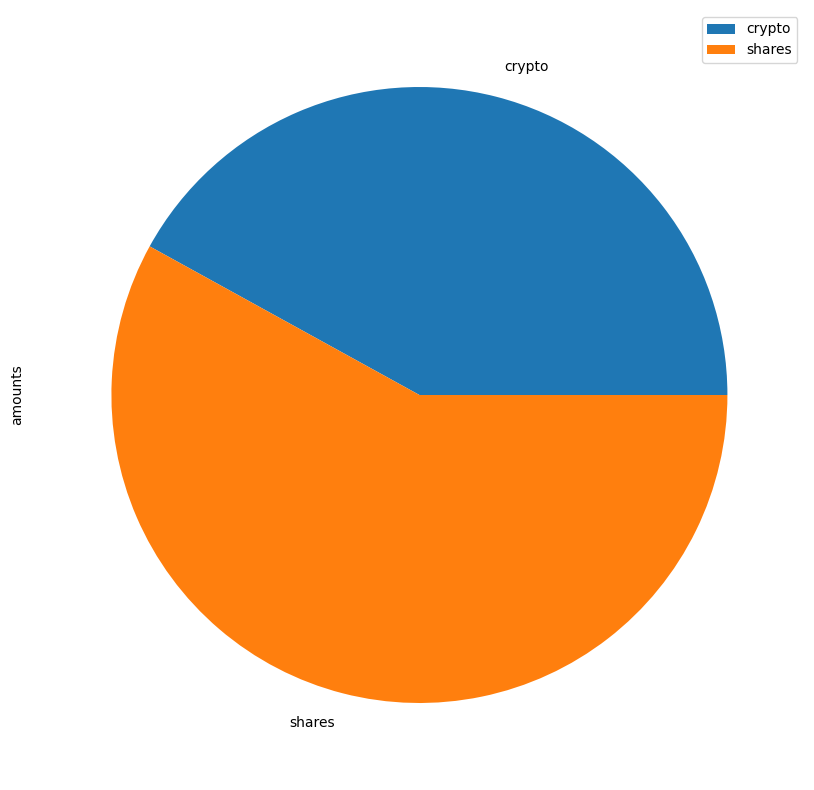

In [12]:
# Plot savings pie chart
df_savings.plot(y='amounts' , kind = 'pie', figsize=(20,10))

In [13]:
# Set ideal emergency fund


emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(df_savings['amounts'])


# Validate saving health

if total_savings > emergency_fund:
    print("congrats! your savings are higher than your emergency fund!")

elif total_savings == emergency_fund:
    print("congrats, on reaching your goal!")
else:
    distance_away = emergency_fund-total_savings
    print(f" you need to save ${distance_away:0,.2f} to reach your savings goal")





congrats! your savings are higher than your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
# time frame chosen was the default time frame. Change these lines to adjust time period 
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-20', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


df_stock_data  = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end= end_date
).df
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

df_stock_data_reformat = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data_reformat.head()


SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  238.68  239.1700  238.195  238.63  66882521   
2017-05-02 04:00:00+00:00  238.84  238.9800  238.300  238.76  57375732   
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.52  73137731   
2017-05-04 04:00:00+00:00  238.83  238.9225  237.780  238.74  61462732   
2017-05-05 04:00:00+00:00  239.19  239.7200  238.680  239.68  62001269   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-05-01 04:00:00+00:00      180740  238.682276  108.86  108.9599  108.620   
2017-05-02 04:00:00+00:00      176648  238.630973  108.68  108.9400  108.679   
2017-05-03 04:00:00+00:00      223568  238.418100  108.97  108.9900  108.770   
2017-05-04 04:00:00+00:00      208872  238.541805  108.55  108.7000  108.550   
2017-05-05 04:00:00+00:00      204885  239.253410  108.72  108.7400  108.570   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2017-05-01 04:00:00+00:00  108.730  2510027       11008  108.743679  
2017-05-02 04:00:00+00:00  108.885  2841518        9263  108.831870  
2017-05-03 04:00:00+00:00  108.795  1923403       10987  108.902870  
2017-05-04 04:00:00+00:00  108.680  1897912        7501  108.629678  
2017-05-05 04:00:00+00:00  108.700  1421843        7385  108.675918

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims =500
num_years = 30

MC_stock = MCSimulation(
    portfolio_data = df_stock_data_reformat,
    weights= [.60 ,.40],
    num_simulation = num_sims,
    num_trading_days = 252*num_years
)

In [17]:
# Printing the simulation input data
MC_stock.portfolio_data.head()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  238.68  239.1700  238.195  238.63  66882521   
2017-05-02 04:00:00+00:00  238.84  238.9800  238.300  238.76  57375732   
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.52  73137731   
2017-05-04 04:00:00+00:00  238.83  238.9225  237.780  238.74  61462732   
2017-05-05 04:00:00+00:00  239.19  239.7200  238.680  239.68  62001269   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-01 04:00:00+00:00      180740  238.682276          NaN  108.86   
2017-05-02 04:00:00+00:00      176648  238.630973     0.000545  108.68   
2017-05-03 04:00:00+00:00      223568  238.418100    -0.001005  108.97   
2017-05-04 04:00:00+00:00      208872  238.541805     0.000922  108.55   
2017-05-05 04:00:00+00:00      204885  239.253410     0.003937  108.72   

                                                                            \
                               high      low    close   volume trade_count   
timestamp                                                                    
2017-05-01 04:00:00+00:00  108.9599  108.620  108.730  2510027       11008   
2017-05-02 04:00:00+00:00  108.9400  108.679  108.885  2841518        9263   
2017-05-03 04:00:00+00:00  108.9900  108.770  108.795  1923403       10987   
2017-05-04 04:00:00+00:00  108.7000  108.550  108.680  1897912        7501   
2017-05-05 04:00:00+00:00  108.7400  108.570  108.700  1421843        7385   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-01 04:00:00+00:00  108.743679          NaN  
2017-05-02 04:00:00+00:00  108.831870     0.001426  
2017-05-03 04:00:00+00:00  108.902870    -0.000827  
2017-05-04 04:00:00+00:00  108.629678    -0.001057  
2017-05-05 04:00:00+00:00  108.675918     0.000184

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\joseo\Documents\UofM_FinTech_BootCamp\Module-5-APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003410,0.995006,0.985591,0.988342,1.007992,1.000970,0.999223,0.993072,0.990048,0.998537,...,1.002610,1.001039,0.989153,1.005911,0.996385,1.005147,0.988249,0.996296,1.004446,1.004927
2,1.011936,0.991364,0.985835,0.985079,1.002166,0.993708,1.011296,0.987703,0.990319,1.007329,...,0.995811,0.989767,0.993719,1.014280,0.984079,1.003400,0.978643,0.998751,1.008753,0.987108
3,1.021322,0.986840,0.974747,0.987555,1.015462,0.983290,1.020360,0.982114,0.992613,0.998739,...,0.994972,0.980726,1.000239,1.009641,0.994378,1.000093,0.983654,1.007007,0.996185,0.989406
4,1.031293,0.983417,0.972645,0.992831,1.007153,0.990462,1.019701,0.986887,0.979669,1.006345,...,0.991303,0.991391,1.001027,1.011429,0.997865,1.005952,0.990670,1.005021,0.986352,0.989574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.868487,3.505929,4.163587,9.224838,4.252038,4.219326,6.612602,5.879894,3.594326,2.684980,...,2.566915,7.471010,0.789214,2.265969,1.970928,2.576075,2.559104,5.505388,2.540535,1.488003
7557,4.816167,3.502050,4.157318,9.239000,4.224757,4.190642,6.683095,5.866138,3.629446,2.698230,...,2.551125,7.508044,0.787635,2.274312,1.964113,2.556338,2.569854,5.495154,2.558411,1.477423
7558,4.801062,3.481510,4.166165,9.265828,4.189517,4.155180,6.652286,5.846260,3.600237,2.658024,...,2.532160,7.598696,0.778471,2.273426,1.965360,2.562413,2.541963,5.486748,2.567724,1.487742
7559,4.817268,3.472674,4.245438,9.295254,4.214922,4.126537,6.586485,5.852360,3.594016,2.629145,...,2.522279,7.542400,0.771985,2.282747,1.976394,2.559853,2.551703,5.494340,2.597370,1.504018


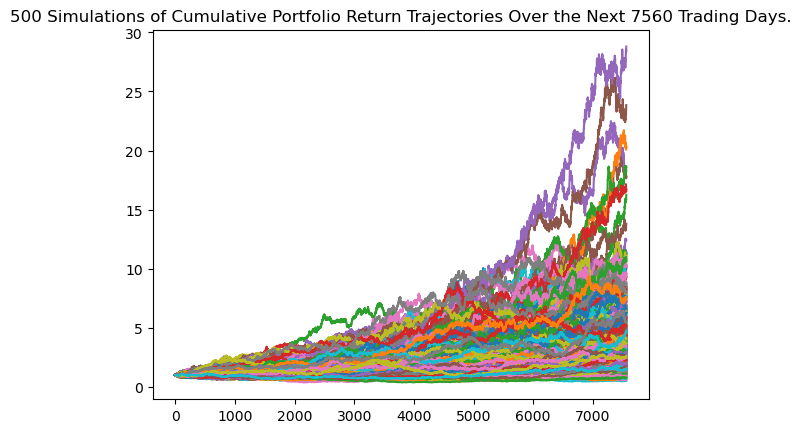

In [19]:
# Plot simulation outcomes
line_plot = MC_stock.plot_simulation()
#line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

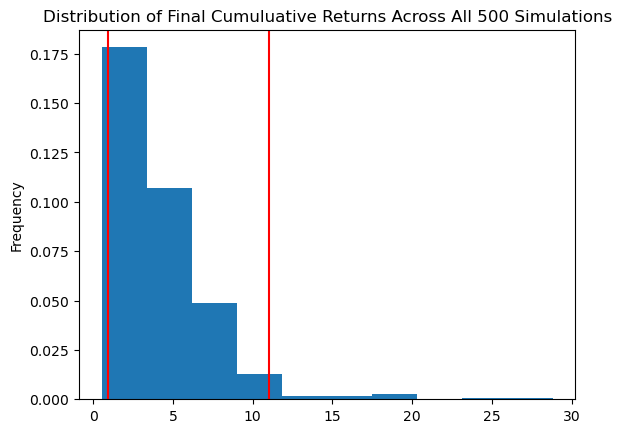

In [20]:
# Plot probability distribution and confidence intervals
hist_plot= MC_stock.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_stock.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              4.164999
std               3.175138
min               0.524960
25%               2.120811
50%               3.329087
75%               5.267686
max              28.804690
95% CI Lower      0.889658
95% CI Upper     11.011531
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17,793.17 and $220,230.62


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26,689.75 and $330,345.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims =500
num_years = 5

five_year_mc_stock = MCSimulation(
    portfolio_data = df_stock_data_reformat,
    weights= [.90 ,.1],
    num_simulation = num_sims,
    num_trading_days = 252*num_years
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
five_year_mc_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\joseo\Documents\UofM_FinTech_BootCamp\Module-5-APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986527,0.997749,0.997137,0.976632,0.995929,1.007399,0.990494,1.010626,1.005533,1.004673,...,0.996909,0.993592,1.006702,0.977077,0.996064,0.997972,1.017605,1.000338,1.005182,1.002971
2,0.991481,1.006295,1.013786,0.985228,0.998277,0.999045,0.993885,1.014723,1.005307,0.999894,...,0.999371,1.011018,1.020808,0.988699,0.980004,0.986549,1.001616,1.009437,1.015655,1.002653
3,0.982233,1.011725,1.021395,0.981647,1.009201,1.004104,1.008048,1.023460,0.989028,0.982446,...,0.990643,1.005145,1.015110,0.992029,0.966672,0.995636,0.992489,1.011296,1.004034,1.016692
4,0.968542,0.990277,1.022782,0.999797,1.017961,1.014702,1.029447,1.016003,0.994856,1.010079,...,0.982865,1.007909,0.992283,0.989484,0.965495,1.000800,0.969460,1.017976,0.998831,1.006701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.558098,1.552261,1.254394,1.276812,1.442600,1.523429,1.983779,1.970728,1.804088,1.867988,...,2.637881,1.587697,1.454649,1.159791,2.172640,1.038355,0.719888,1.318065,0.826938,1.691260
1257,1.562953,1.546314,1.256805,1.273035,1.434299,1.545264,1.973645,1.948622,1.818352,1.861003,...,2.668840,1.574931,1.435252,1.160703,2.193529,1.042912,0.728892,1.335672,0.827569,1.678906
1258,1.563074,1.560637,1.259181,1.283017,1.412437,1.574173,2.005035,1.931484,1.817116,1.855794,...,2.653573,1.573599,1.442068,1.159103,2.205460,1.045976,0.737858,1.320849,0.826699,1.635159
1259,1.551440,1.562163,1.277031,1.291191,1.425182,1.579774,2.017682,1.964242,1.826113,1.866121,...,2.684747,1.561241,1.445244,1.170729,2.179536,1.031253,0.736987,1.313803,0.827805,1.642532


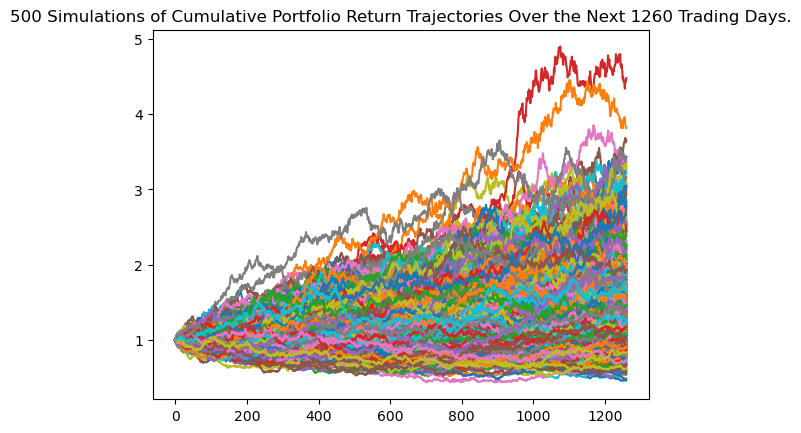

In [26]:
# Plot simulation outcomes
five_year_plot = five_year_mc_stock.plot_simulation()


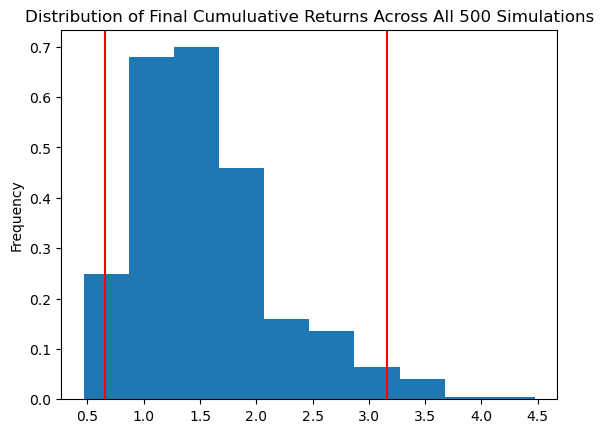

In [27]:
# Plot probability distribution and confidence intervals
five_year_hist_plot = five_year_mc_stock.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_tbl = five_year_mc_stock.summarize_cumulative_return()

# Print summary statistics
print(five_year_tbl)

count           500.000000
mean              1.547363
std               0.634962
min               0.468454
25%               1.092583
50%               1.456167
75%               1.851344
max               4.475220
95% CI Lower      0.659507
95% CI Upper      3.160530
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = five_year_tbl[8] * initial_investment
ci_upper_five = five_year_tbl[9] * initial_investment


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0,.0f} and ${ci_upper_five:0,.0f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $39,570 and $189,632


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims =500
num_years = 10

ten_year_mc_stock = MCSimulation(
    portfolio_data = df_stock_data_reformat,
    weights= [.80 ,.20],
    num_simulation = num_sims,
    num_trading_days = 252*num_years
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_mc_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\joseo\Documents\UofM_FinTech_BootCamp\Module-5-APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005721,0.992855,0.994415,0.991144,0.984204,1.017698,0.992410,1.033462,0.993078,1.020399,...,1.006265,0.997845,1.016012,0.998260,1.000863,1.010556,1.010173,0.993445,0.998532,1.004718
2,1.004860,1.000047,0.996869,0.977218,0.990608,1.033209,0.985094,1.051534,0.982110,1.013261,...,0.986973,1.009197,1.013185,0.975279,0.987490,1.017020,1.026582,1.013767,1.001443,1.012681
3,0.995693,0.991757,1.011729,0.984997,1.027185,1.042065,0.977915,1.055994,0.984568,1.012710,...,1.000306,1.010225,0.997085,0.972052,0.975102,1.032361,1.002451,1.013714,0.994752,1.015902
4,0.996956,0.990684,0.986365,0.978713,1.016175,1.043326,0.984248,1.065304,0.991179,1.006465,...,0.988060,1.002619,0.991242,0.962552,0.967657,1.043209,1.006563,1.024662,0.989691,1.021102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.218678,1.855213,1.859242,1.386309,0.976345,3.367013,2.061765,1.550496,1.484792,3.148589,...,1.430497,1.876856,1.884618,2.461429,1.525959,3.344867,2.002517,2.115877,1.014005,2.622091
2517,2.205640,1.869153,1.861652,1.375104,0.975441,3.356533,2.044691,1.566852,1.470289,3.101337,...,1.452354,1.892411,1.834335,2.458392,1.537442,3.407855,1.984424,2.085777,1.016404,2.606479
2518,2.235195,1.860521,1.850452,1.376912,0.979100,3.375267,2.051953,1.547052,1.445068,3.060681,...,1.480572,1.879518,1.838054,2.453921,1.566518,3.455127,1.981468,2.090858,1.026300,2.588783
2519,2.215262,1.846888,1.867125,1.382852,0.993192,3.441507,2.054756,1.562478,1.460426,3.071282,...,1.474534,1.865356,1.851799,2.471094,1.575615,3.477243,1.997606,2.080035,1.017202,2.629654


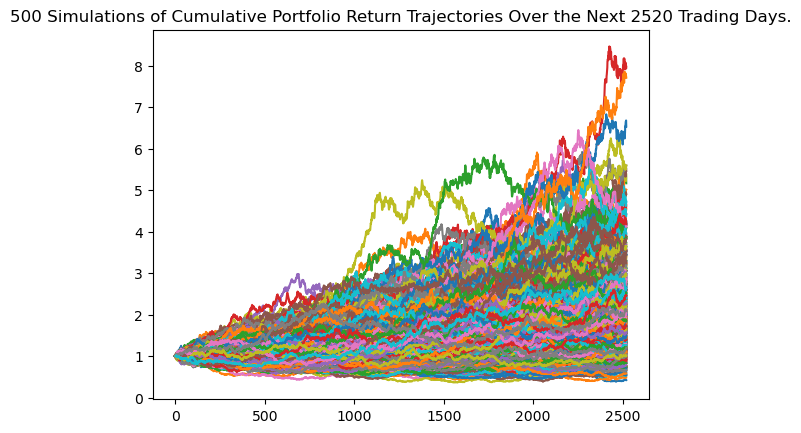

In [32]:
# Plot simulation outcomes
ten_year_plot = ten_year_mc_stock.plot_simulation()


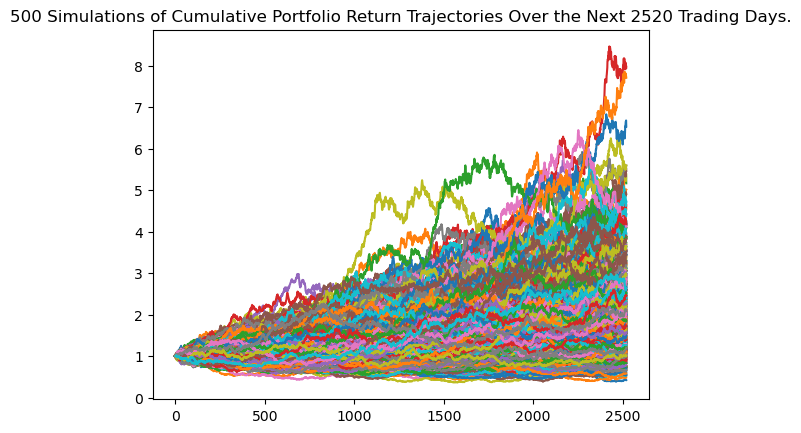

In [33]:
# Plot probability distribution and confidence intervals
ten_year_hist_plot = ten_year_mc_stock.plot_simulation()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = ten_year_mc_stock.summarize_cumulative_return()

# Print summary statistics
print(ten_year_tbl)

count           500.000000
mean              2.047996
std               1.051182
min               0.422306
25%               1.302559
50%               1.832137
75%               2.514544
max               7.979496
95% CI Lower      0.691144
95% CI Upper      4.594429
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = ten_year_tbl[8] * initial_investment
ci_upper_ten = ten_year_tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0,.0f} and ${ci_upper_ten:0,.0f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $41,469 and $275,666


## Will weighting the portfolio more heavily toward stock allow the credit union members to retire after only 10 years?

Given the preformance of the portfolioit looks like you could be close to retiremnt in 10 years. The 10 year simulation at the upper ~95% limit is 275K vs 330K from the 30 year. The new portfolio uses a much higher inital investment with a riskyer mix of stocks